Zihao Mao

Cameron Matson

9/22/2017

# Lab 7: CNN

## Introduction

For this lab we examine the images of the Stanford Dog Dataset.  The dataset consits of ~20,000 images of dogs from 120 different breeds.

#### Issues
The dataset is primarily used for fine-grained classification problems, meaning that the instances are all members of the same main class and are divided by subclass.  In this case, the main class is 'Dog' and the subclass is the breed: 'Beagle', 'Poodle', 'Lab'...  These are potentially more difficult than standard classification problems because in theory all members of teh main class should at least share similar features.  In other words as the saying goes "a dog is a dog is a dog not a cat."

Another challenge with this dataset is that there is that they do not depict a standard scene.  These are not faces of dogs.  These are not photoshoot photos of dogs.  The images in the dataset are not even exclusively of dogs.  Some contain multiple dogs or even people.  The dataset would benefit from preprocessing in the form of some sort of standardization such that all the images are of the same kind, using facial detection for instance.

#### Uses


#### Accuracy
How well does a system like that need to work?  Well each successive level probably does not need to be as precise as the last (and it likely won't be cause each successive level is more difficult than the last.)  The key point is that a human (with some knowledge of dog breeds) would be close to perfect at identifying dogs, but with thousands of street cameras around, it would take them a long time to go through all the footage.  Assuming you do a good job of identifying the dogs in the image you probably don't have to be that accurate at identifing the bichon frise.  As long as you have as few false negatives as possible (so that you don't miss a potential bichon) you could probably get away with a few false positives.

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.misc import imresize
from skimage.color import rgb2gray
%matplotlib inline
imagedir = '../../data/dogs'

## Data Preprocessing

There are 120 different breeds included in the dataset with bout 150 images of each breed for a total of 20,580 images.  The images are stored in directories by breed.  To make the size of the dataset more managable, we'll take a sample of 50 images from each 60 of the breed.

In [3]:
# remove dsstore
for d in os.listdir(imagedir):
    if d.find('.DS') != -1:
        os.remove(os.path.join(imagedir,d))
        continue
    for f in os.listdir(os.path.join(imagedir, d)):
        if f.find('.DS') != -1:
            os.remove(os.path.join(imagedir,d,f))
    

In [33]:
def load_images(num_classes, h, w):
    
    # preinitialize the matrix
    #img_arr = np.empty((num_samples_per_breed*num_breeds,h*w))  # 20 instances of each breed, each img will be 200x200 = 40000 pixels
    img_arr = []
    label_arr = []
    
    # sample 60 breeds from the dataset
    a = np.arange(len(os.listdir(imagedir)))
    np.random.shuffle(a)
    breed_sample_idxs = a[:num_classes]
    for i, idx in enumerate(breed_sample_idxs):
        breed = os.listdir(imagedir)[idx]
        if breed[0] == '.' : 
            continue # stupid ds.store on mac
        print(i,breed)
        
        for img in os.listdir(os.path.join(imagedir, breed)):
            dog_path = os.path.join(imagedir,breed,img)            

            img = plt.imread(dog_path)
            
            # converts image to gray, resizes it to be 200x200, and then linearizes it
            img_gray_resize_flat = rgb2gray(imresize(img, (h,w,3))).flatten()
                        
            img_arr.append(img_gray_resize_flat)

            # add name to list of labels
            fname = dog_path.split('/')[-1] # 'dog_name_123497.jpg'
            dog_name = fname[:fname.rfind('_')] # 'dog_name'
            label_arr.append(breed)
            
    return img_arr, label_arr

In [91]:
%%time
num_breeds = 5
h=128
w=128
dogs, labels = load_images(num_classes=num_breeds, h=h, w=w)
print(len(dogs))

0 Bouvier_des_Flandres
1 Sussex_spaniel
2 bull_mastiff
3 affenpinscher
4 German_shepherd
759
Wall time: 6.43 s


In [235]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df= pd.DataFrame(dogs)

X = np.array(dogs)

enc = LabelEncoder()
y = enc.fit_transform(labels)

df


,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0.815611,0.807768,0.835219,0.838024,0.846173,0.834408,0.826565,0.834408,0.851516,0.854604,...,0.946184,0.938341,0.934420,0.938341,0.938341,0.930498,0.914812,0.903047,0.910890,0.920132
1,0.551849,0.293851,0.162177,0.223806,0.308139,0.214320,0.245127,0.339214,0.210857,0.098186,...,0.656923,0.799483,0.933604,0.782345,0.743948,0.671664,0.576154,0.798046,0.736149,0.759411
2,0.661000,0.643058,0.602398,0.550524,0.515475,0.493590,0.484325,0.480121,0.458258,0.431335,...,0.868117,0.894437,0.858570,0.853533,0.834773,0.816840,0.824385,0.852945,0.837229,0.831060
3,0.288901,0.293090,0.278788,0.270364,0.283796,0.302838,0.302838,0.304810,0.291662,0.283551,...,0.487934,0.499982,0.496343,0.540596,0.556282,0.550129,0.542003,0.549846,0.545924,0.494944
4,0.413810,0.413832,0.433454,0.486933,0.522740,0.485725,0.425541,0.481336,0.561190,0.527236,...,0.802873,0.833695,0.856674,0.840154,0.834849,0.835682,0.842409,0.836515,0.822778,0.800365
5,0.729404,0.746199,0.742583,0.748239,0.754370,0.645517,0.411345,0.378692,0.360245,0.382137,...,0.531279,0.566022,0.557346,0.565472,0.554823,0.552851,0.544175,0.545313,0.545313,0.503009
6,0.844939,0.848860,0.852782,0.856704,0.860625,0.860625,0.860625,0.860625,0.860625,0.860625,...,0.006184,0.008424,0.008141,0.007293,0.013737,0.017391,0.017956,0.016549,0.017398,0.025256
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.885478,0.891089,0.879607,0.839267,0.859173,0.909059,0.919990,0.888015,0.883513,0.863622
8,0.804712,0.804712,0.800790,0.801073,0.796869,0.804980,0.790127,0.805813,0.801891,0.790127,...,0.690904,0.716420,0.735745,0.760912,0.770392,0.760309,0.792529,0.741564,0.678566,0.635161
9,0.324354,0.560185,0.691655,0.715543,0.698450,0.732605,0.740448,0.732605,0.721942,0.623115,...,0.149355,0.182692,0.251331,0.444344,0.566478,0.578235,0.592790,0.600916,0.598125,0.606802


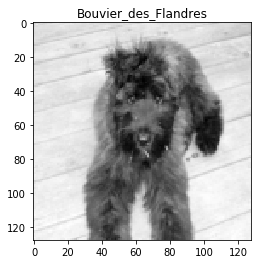

In [193]:
ex = dogs[0].reshape((h,w))
plt.imshow(ex, cmap='gray')
plt.title(labels[0])
plt.show()

### Cross Validation Scheme

Since these networks take SOO long to train and we don't have that much data, we're  going to use a 3-fold cross-validation set up.  K-fold because we can't afford to not train on all of thee data, and 3 folds so we can finish on time.  We'll also use stratified folds to be safe even though our breed distribution is pretty uniform.  After we train the 3 models we'll be able to look at the average performance to get a sense of how the model might perform once deployed.

In [256]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np

N_SPLITS = 3

skf = StratifiedKFold(n_splits=N_SPLITS, random_state=0, shuffle=False)
for train, test in skf.split(X, y):
    X_train = X[train]
    y_train = y[train]
    
    X_test = X[test]
    y_test = y[test]
    
    #arc
    
    

# Split it into train / test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Split X_train again to create validation data
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

X_train.shape

(505, 16384)
(254, 16384)
(506, 16384)
(253, 16384)
(507, 16384)
(252, 16384)


(607, 16384)

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

keras.__version__

Using TensorFlow backend.


'2.0.8'

In [97]:
NUM_CLASSES = 5
print(X_train.shape)
print(X_test.shape)

(607, 16384)
(152, 16384)


In [98]:
%%time

y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)

# make a 3 layer keras MLP
mlp = Sequential()
mlp.add( Dense(input_dim=X_train.shape[1], units=30, activation='relu') )
mlp.add( Dense(units=15, activation='relu') )
mlp.add( Dense(NUM_CLASSES) )
mlp.add( Activation('softmax') )

mlp.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

mlp.fit(X_train, y_train_ohe, 
        batch_size=32, epochs=100, 
        shuffle=True, verbose=1)

Epoch 1/100
607/607 [==============================] - 0s - loss: 0.3172 - acc: 0.1845     
Epoch 2/100
607/607 [==============================] - 0s - loss: 0.3187 - acc: 0.1960     
Epoch 3/100
607/607 [==============================] - 0s - loss: 0.3196 - acc: 0.1944     
Epoch 4/100
607/607 [==============================] - 0s - loss: 0.3018 - acc: 0.2142     
Epoch 5/100
607/607 [==============================] - 0s - loss: 0.2358 - acc: 0.2026     
Epoch 6/100
607/607 [==============================] - 0s - loss: 0.2207 - acc: 0.2570     
Epoch 7/100
607/607 [==============================] - 0s - loss: 0.2246 - acc: 0.2405     
Epoch 8/100
607/607 [==============================] - 0s - loss: 0.2091 - acc: 0.2471     
Epoch 9/100
607/607 [==============================] - 0s - loss: 0.1853 - acc: 0.2191     
Epoch 10/100
607/607 [==============================] - 0s - loss: 0.1752 - acc: 0.2735     
Epoch 11/100
607/607 [==============================] - 0s - loss: 0.1792 - acc

607/607 [==============================] - 0s - loss: 0.1116 - acc: 0.5865     
Epoch 90/100
607/607 [==============================] - 0s - loss: 0.1112 - acc: 0.5799     
Epoch 91/100
607/607 [==============================] - 0s - loss: 0.1140 - acc: 0.5733     
Epoch 92/100
607/607 [==============================] - 0s - loss: 0.1141 - acc: 0.5799     - ETA: 0s - loss: 0.1132 - acc: 0
Epoch 93/100
607/607 [==============================] - 0s - loss: 0.1127 - acc: 0.5783     
Epoch 94/100
607/607 [==============================] - 0s - loss: 0.1133 - acc: 0.5634     
Epoch 95/100
607/607 [==============================] - 0s - loss: 0.1127 - acc: 0.5651     
Epoch 96/100
607/607 [==============================] - 0s - loss: 0.1084 - acc: 0.5898     
Epoch 97/100
607/607 [==============================] - 0s - loss: 0.1132 - acc: 0.5667     
Epoch 98/100
607/607 [==============================] - 0s - loss: 0.1112 - acc: 0.5881     
Epoch 99/100
607/607 [============================

In [252]:
%%time

cnn_layers = [32, 16]

# make a CNN with conv layer and max pooling
cnn = Sequential()
cnn.add(Reshape((1, h,w), input_shape=(1,h*w)))

for n in cnn_layers:
    cnn.add(Conv2D(filters=n, kernel_size= (3, 3), padding='same', input_shape=(1, h,w), data_format='channels_first'))
    cnn.add(Activation('relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    
# add one layer on flattened output
cnn.add(Dropout(0.25))
cnn.add(Flatten())

cnn.add(Dropout(0.25))
cnn.add(Dense(80))
cnn.add(Activation('relu'))

cnn.add(Dropout(0.50))
cnn.add(Dense(20))
cnn.add(Activation('relu'))


cnn.add(Dense(NUM_CLASSES))
cnn.add(Activation('softmax'))


# Let's train the model 
cnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# we need to exapnd the dimensions here to give the 
#   "channels" dimension expected by Keras
cnn.fit(np.expand_dims(X_train, axis=1), y_train_ohe, 
        batch_size=50, epochs=30,
        validation_data=((np.expand_dims(X_test, axis=1), y_test_ohe)),
        shuffle=True, verbose=1)

Train on 607 samples, validate on 152 samples
Epoch 1/30
607/607 [==============================] - 29s - loss: 1.6561 - acc: 0.1730 - val_loss: 1.6087 - val_acc: 0.2105
Epoch 2/30
607/607 [==============================] - 27s - loss: 1.6001 - acc: 0.2537 - val_loss: 1.6109 - val_acc: 0.2039
Epoch 3/30
607/607 [==============================] - 27s - loss: 1.5864 - acc: 0.2965 - val_loss: 1.6117 - val_acc: 0.2237
Epoch 4/30
607/607 [==============================] - 27s - loss: 1.5434 - acc: 0.3855 - val_loss: 1.6166 - val_acc: 0.1776
Epoch 5/30
607/607 [==============================] - 28s - loss: 1.4805 - acc: 0.4119 - val_loss: 1.6162 - val_acc: 0.2237
Epoch 6/30
607/607 [==============================] - 29s - loss: 1.3989 - acc: 0.4745 - val_loss: 1.7778 - val_acc: 0.1974
Epoch 7/30
607/607 [==============================] - 32s - loss: 1.3407 - acc: 0.4778 - val_loss: 1.6391 - val_acc: 0.2303
Epoch 8/30
607/607 [==============================] - 28s - loss: 1.2089 - acc: 0.5700

KeyboardInterrupt: 

In [254]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

def compare_mlp_cnn(cnn, mlp, X_test, y_test):
    plt.figure(figsize=(15,5))
    if cnn is not None:
        yhat_cnn = np.argmax(cnn.predict(np.expand_dims(X_test, axis=1)), axis=1)
        acc_cnn = mt.accuracy_score(y_test,yhat_cnn)
        plt.subplot(1,2,1)
        cm = mt.confusion_matrix(y_test,yhat_cnn)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=enc.inverse_transform([0, 1, 2, 3, 4]), 
                   yticklabels=enc.inverse_transform([0, 1, 2, 3, 4]))
        plt.title('CNN: '+str(acc_cnn))
    
    if mlp is not None:
        yhat_mlp = np.argmax(mlp.predict(X_test), axis=1)
        acc_mlp = mt.accuracy_score(y_test,yhat_mlp)
        plt.subplot(1,2,2)
        cm = mt.confusion_matrix(y_test,yhat_mlp)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=enc.inverse_transform([0, 1, 2, 3, 4]), 
                   yticklabels=enc.inverse_transform([0, 1, 2, 3, 4]))
        plt.title('MLP: '+str(acc_mlp))

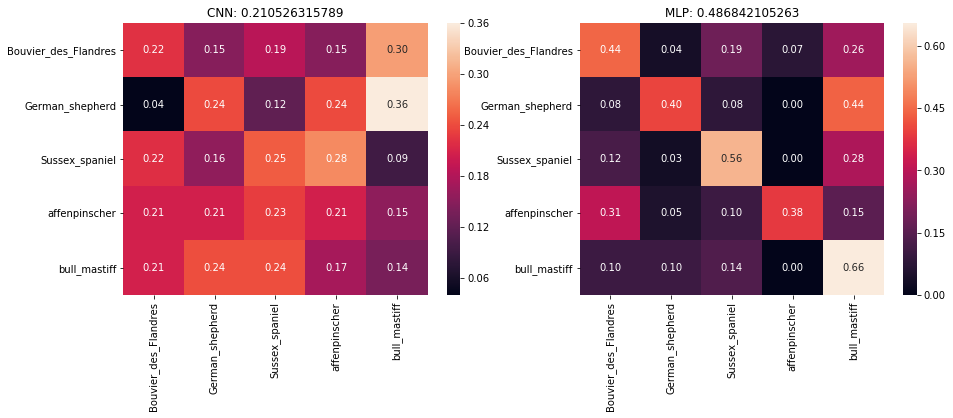

In [255]:
compare_mlp_cnn(cnn,mlp,X_test,y_test)

Let's see what LeNet can do on our dataset

In [165]:
img_wh = 128
X = np.expand_dims(X.reshape((-1,img_wh,img_wh)), axis=3)

# Split it into train / test subsets
X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(X, y, test_size=0.2)

# Split X_train again to create validation data
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

X_train_gen.shape

(607, 128, 128, 1)

In [140]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5, # used, Int. Degree range for random rotations.
    width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0., # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None)

datagen.fit(X)

In [176]:
%%time

# now lets use the LeNet architecture with batch norm
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

l2_lambda = 0.01

lenet = Sequential()
lenet.add(Reshape((h,w, 1), input_shape=(1,h*w)))

lenet.add(Conv2D(filters=6,kernel_size=(5,5),
               padding='valid', 
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda)))
lenet.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
lenet.add(BatchNormalization())
lenet.add(Activation("sigmoid"))

lenet.add(Conv2D(filters=16,kernel_size=(5,5), 
               padding='valid', 
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda)))
lenet.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
lenet.add(BatchNormalization())
lenet.add(Activation("sigmoid"))
#lenet.add(Dropout(0.5))

lenet.add(Conv2D(filters=120,kernel_size=(1,1), 
               padding='valid', 
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda)))

lenet.add(Flatten())
lenet.add(Dense(84))
lenet.add(Activation("sigmoid"))
lenet.add(Dense(NUM_CLASSES))
lenet.add(Activation('softmax'))

lenet.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adadelta', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

lenet.fit(np.expand_dims(X_train, axis=1), y_train_ohe, 
        batch_size=32, epochs=10, 
        shuffle=True, verbose=1)

# the flow method yields batches of images indefinitely, with the given transofmrations
#lenet.fit_generator(datagen.flow(X_train_gen, y_train_ohe_gen, batch_size=128), 
#                      steps_per_epoch=int(len(X_train)/128), # how many generators to go through per epoch
#                      epochs=10, verbose=1,
#                      validation_data=(X_test_gen,y_test_ohe_gen),
#                      callbacks=[EarlyStopping(monitor='val_loss', patience=2)]
#                     )

Epoch 1/10
607/607 [==============================] - 14s - loss: 4.9360 - acc: 0.1944    
Epoch 2/10
607/607 [==============================] - 14s - loss: 4.6706 - acc: 0.1960    
Epoch 3/10
607/607 [==============================] - 16s - loss: 4.4322 - acc: 0.1960    
Epoch 4/10
607/607 [==============================] - 13s - loss: 4.2297 - acc: 0.1960    
Epoch 5/10
607/607 [==============================] - 15s - loss: 4.0500 - acc: 0.1960    
Epoch 6/10
607/607 [==============================] - 14s - loss: 3.8863 - acc: 0.1960    
Epoch 7/10
607/607 [==============================] - 16s - loss: 3.7354 - acc: 0.1960    
Epoch 8/10
607/607 [==============================] - 15s - loss: 3.5991 - acc: 0.1960    
Epoch 9/10
607/607 [==============================] - 15s - loss: 3.4770 - acc: 0.1960    
Epoch 10/10
607/607 [==============================] - 15s - loss: 3.3662 - acc: 0.1960    
Wall time: 2min 33s


In [185]:
def summarize_net(net, X_test, y_test, labels, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(np.expand_dims(X_test, axis=1)), axis=1)
    print(yhat.shape)
    acc = mt.accuracy_score(y_test,yhat)
    cm = mt.confusion_matrix(y_test,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
    plt.title(title_text+'{:.4f}'.format(acc))


(152,)


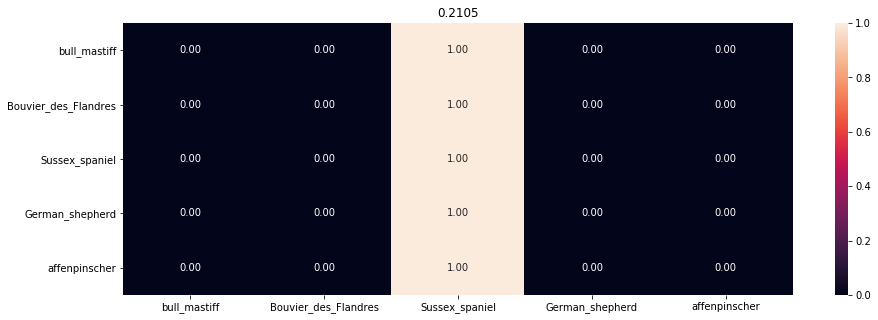

In [187]:
summarize_net(lenet, X_test, y_test, labels = set(labels))